In [5]:
setwd('C:/Users/bki19/OneDrive/deskto/Linear_Regression/data')

1. Fit the largest model possible to the data <br>
2. Perfrom a thorough analysis of this model (Residual Analysis, MultiCollinearity)
3. Determine if a transformation of the response or of some of the regressor is necessary<br>
4. Determine if 'All possible regression' are feasible. (if not stepwise selection)<br>
5. Compare and contrast the best models recommended by each criterion<br>
6. Perform a thorough analysis of the best models (3~5 models)<br>
7. Explore further need for further transformation<br>
8. Discuss with sibject-matter expert<br>


# <b>Criteria <br></b>

<b>Coefficient of Multiple Determination <br></b>

p개의 regressor 고정 시켜 놓고 비교 (p가 커질 수록 R^2 커지기 때문에 p가 달라지면 비교 어려워짐


<b> Adjusted R^2 <br></b>

Regressor 추가 된다고 커지지 않음 (추가적인 regressor가 추가전 보다 커진 다는 것은 iff partial F-statistic이 1보다 크다는 것)<br>
adj R^2 maximize 하는 모형 찾기<br>
결국 MSres를 minimize 하는것과 같아짐

<b> Mellow's Cp Statistic<br></b>

yhat과 E(yi)의 MSE를 계산했을 때 bias term과 var(yhat)을 simultaneous 하게 풀음<br>
SSres(p)/sima^2  -n+2p<br>
bias가 0일 때 단순히 p가 됨<br>
bias 허용하면서 variance 볼 때 sigma의 estimate로 Full model의 MSres 사용했을 때 영향력 없는 변수들 사용하면(zero regression coeff) sigma^2 overestimate 하게 됨->따라서 Cp는 증가<br>


<b> Information Criteria<br></b>

based on miximizing expected entropy of the model such as Kullback-Leibler information measure

<b> PRESS STATISTICS<br></b>

# Variable Selection Techniques

<b> All possible Regression<br></b>

변수를 하나 하나 넣었다 뺐다 하면서 2^p번 계산 -> Computationally intensive

In [6]:
df<-read.csv('./Hald_Cement.csv')

In [8]:
#install.packages("olsrr", repos='http://cran.us.r-project.org')
library(olsrr)

also installing the dependencies 'checkmate', 'goftest', 'gridExtra', 'nortest'



package 'checkmate' successfully unpacked and MD5 sums checked
package 'goftest' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'nortest' successfully unpacked and MD5 sums checked
package 'olsrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bki19\AppData\Local\Temp\Rtmpgd8WUA\downloaded_packages


Warning message:
"package 'olsrr' was built under R version 3.5.3"
Attaching package: 'olsrr'

The following object is masked from 'package:datasets':

    rivers



In [23]:
fit <- lm(y ~ ., data = df)
ALL<-ols_step_all_possible(fit)
ALL

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
4,1,1,x4,0.6745420,0.6449549,0.56026422,138.730833,97.74404,55.54014,99.43889,95.185668,92.713313,0.44380641,8.0351538
2,2,1,x2,0.6662683,0.6359290,0.55736686,142.486407,98.07040,55.84980,99.76524,97.605452,95.070246,0.45508874,8.2394213
1,3,1,x1,0.5339480,0.4915797,0.37416794,202.548769,102.41187,60.00353,104.10672,136.304727,132.764344,0.63552542,11.5062432
3,4,1,x3,0.2858727,0.2209521,0.03660085,315.154284,107.95980,65.38502,109.65465,208.858512,203.433616,0.97380991,17.6309134
5,5,2,x1 x2,0.9786784,0.9744140,0.96543051,2.678242,64.31239,29.24371,66.57219,7.621616,7.126706,0.03411460,0.6433831
7,6,2,x1 x4,0.9724710,0.9669653,0.95536268,5.495851,67.63411,30.98052,69.89390,9.840483,9.201491,0.04404632,0.8306901
10,7,2,x3 x4,0.9352896,0.9223476,0.89173803,22.373112,78.74499,37.88664,81.00478,23.131327,21.629293,0.10353658,1.9526445
8,8,2,x2 x3,0.8470254,0.8164305,0.74160368,62.437716,89.92954,46.83922,92.18934,54.682205,51.131412,0.24475933,4.6160303
9,9,2,x2 x4,0.6800604,0.6160725,0.46172985,138.225920,99.52173,55.50846,101.78152,114.365419,106.939093,0.51190335,9.6542237
6,10,2,x1 x3,0.5481667,0.4578001,0.18324307,198.094653,104.00908,59.74250,106.26888,161.512049,151.024254,0.72293320,13.6341340


[[1]]
NULL

[[2]]
NULL


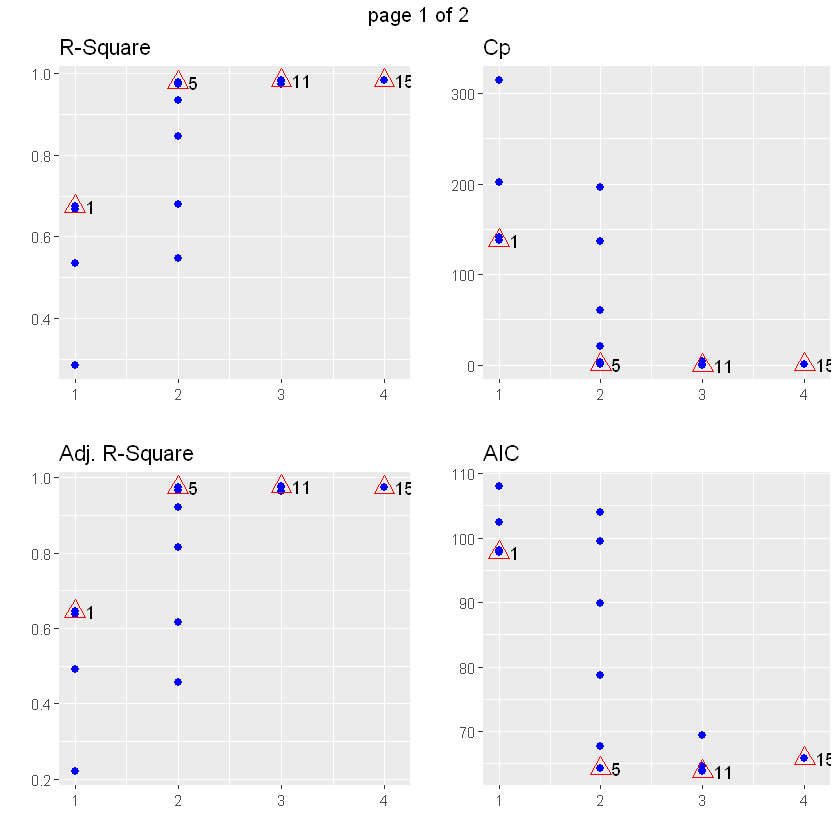

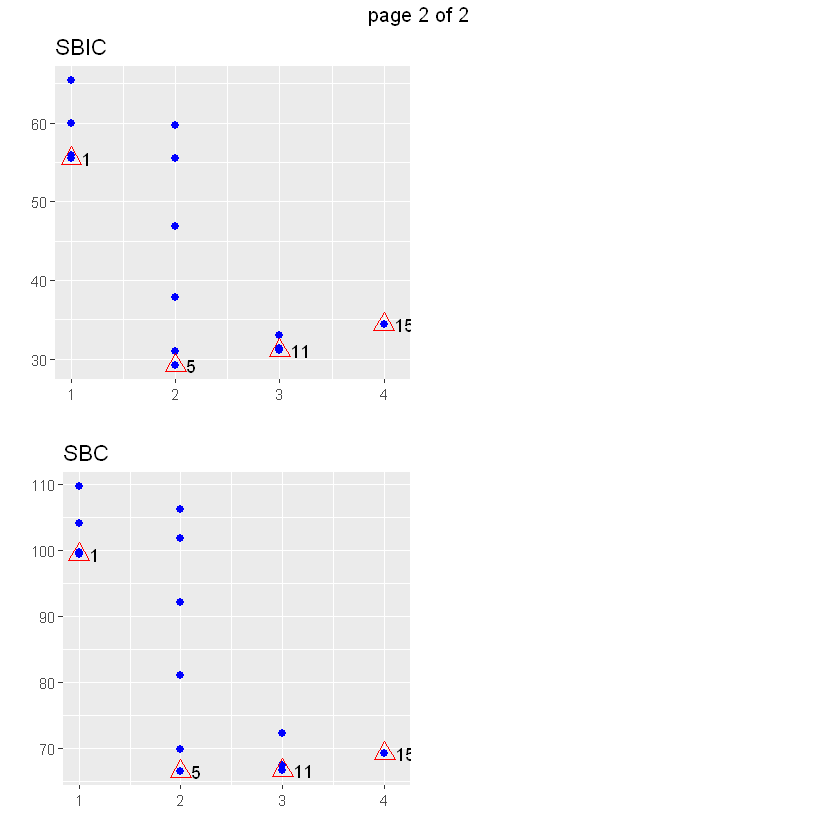

In [14]:
plot(ALL)

x2만 있을 때 coeff estimate은 0.789이지만 x4가 들어오면 0.311로 50퍼센트나 감소<br>
x3까지 들어오면 -0.923으로 아예 마이너스가 되어 버림<br>
=>이것으로 보아 각 regression coeff는 다른 regressor에 굉장히 의존<br>

R^2로 봤을때: (x1,x2)와 (x1,x4)는 거의 같음. 하지만 regressor 하나일 때 x4가 가장 높았기 때문에 (x1,x4)를 선택하는 것이 나아 보임

In [16]:
cor(df[,-1])

,x1,x2,x3,x4
x1,1.0000000,0.2285795,-0.8241338,-0.2454451
x2,0.2285795,1.0000000,-0.1392424,-0.9729550
x3,-0.8241338,-0.1392424,1.0000000,0.0295370
x4,-0.2454451,-0.9729550,0.0295370,1.0000000


Simple Correlation으로 봤을 때: (x1,x3)과 (x2,x4)가 매우 높음
=> (x1과 x2) 혹은 (x3과 x4)가 이미 model에 들어가 있으면 더 이상 변수 추가 필요 없어 보임

MSres로 봤을 때: (x1,x2,x4)가 가장 낮고, 역시 이 때 adj R2 가장 높음<br>
(x1,x2,x3),(x1,x3,x4), (x1,x2), (x1,x4) 역시 좋아 보임<br>
=> 이 후보들 중에 봤을 때 regressor 추가 한다고해서 MSres 큰 차이 없음<br>
(x1,x2), (x1,x4) 중에는 MSres 더 낮은 (x1,x2)가 좋아보임

Cp:(x1,x2,x4), (x1,x2,x3),(x1,x3,x4), (x1,x2)가 좋아 보임<br>
가장 심플한 (x1,x2)를 선택하자

<b> Stepwise Regression<br></b>

1. Forward Selection

모형에 regressor가 없는 것처럼 보고 시작
처음에 y와 simple correlation 가장 높은 것 추가
두번 째 x는 yhat =b0+b1x1과 xhat1=a0+a1x1의 partial correlation이 높은 x2 선택후 partial F statistic이 기존 보다 높아지면 추가

In [18]:
FORWARD<-ols_step_forward_p(fit)
FORWARD

Forward Selection Method    
---------------------------

Candidate Terms: 

1. x1 
2. x2 
3. x3 
4. x4 

We are selecting variables based on p value...

Variables Entered: 

- x4 
- x1 
- x2 

No more variables to be added.

Final Model Output 
------------------

                        Model Summary                         
-------------------------------------------------------------
R                       0.991       RMSE               2.309 
R-Squared               0.982       Coef. Var          2.419 
Adj. R-Squared          0.976       MSE                5.330 
Pred R-Squared          0.969       MAE                1.606 
-------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                 
---------------------------------------------------------------------
                Sum of                                               
    


                            Selection Summary                             
-------------------------------------------------------------------------
        Variable                  Adj.                                       
Step    Entered     R-Square    R-Square      C(p)        AIC       RMSE     
-------------------------------------------------------------------------
   1    x4            0.6745      0.6450    138.7308    97.7440    8.9639    
   2    x1            0.9725      0.9670      5.4959    67.6341    2.7343    
   3    x2            0.9823      0.9764      3.0182    63.8663    2.3087    
-------------------------------------------------------------------------

[[1]]
NULL

[[2]]
NULL


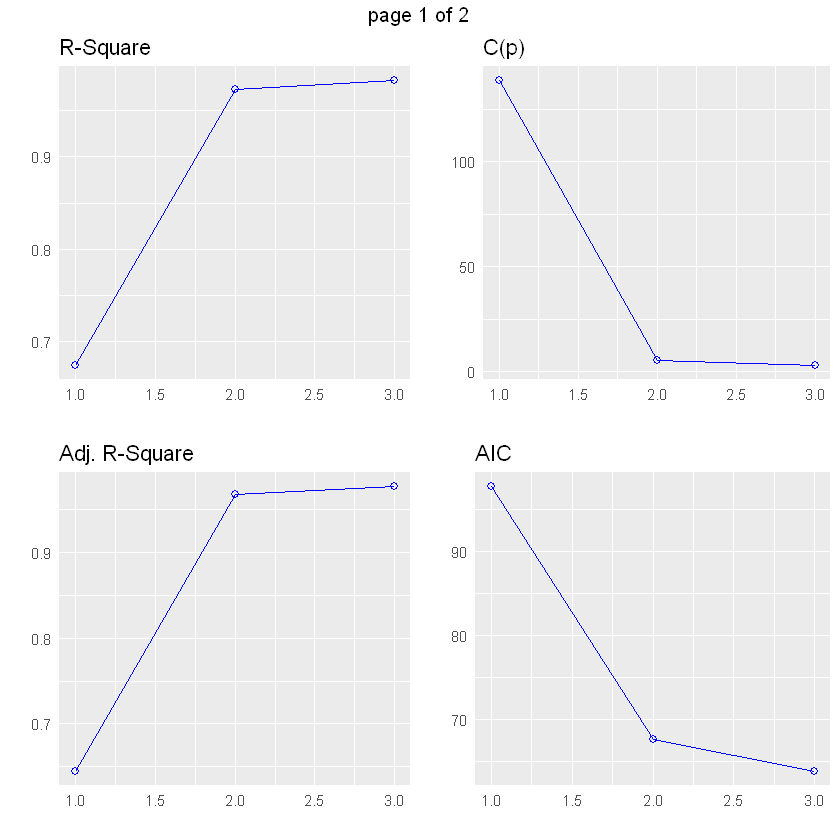

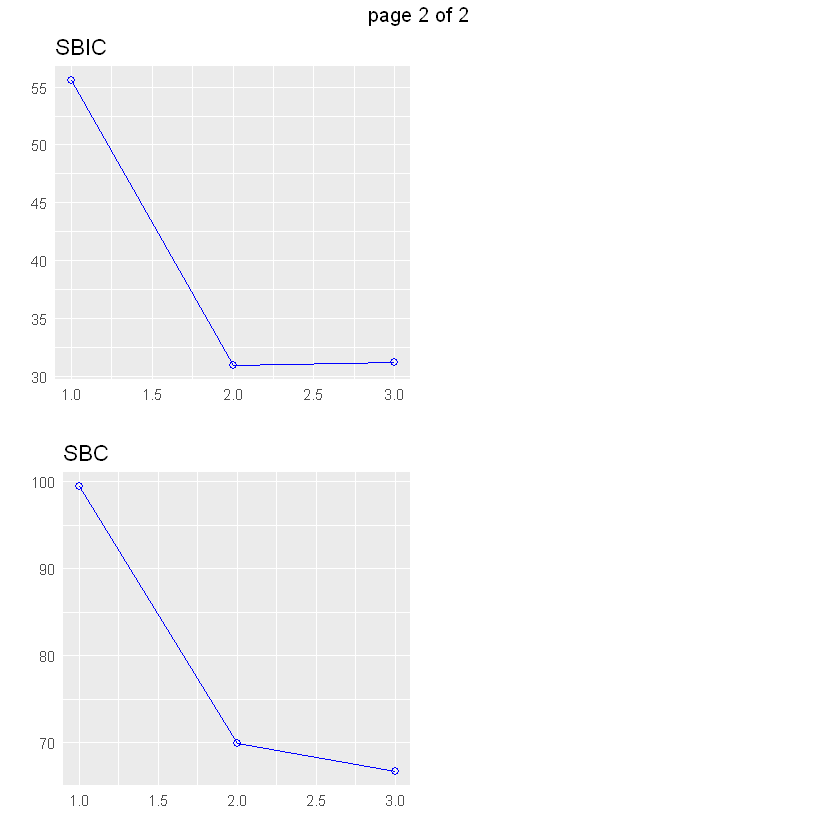

In [19]:
plot(FORWARD)

(x1,x2,x4)가 최종 후보

1. Backward Selection

Forward와 반대 방향<br>
모든 regressor의 partial F-statistic을 구함<br>
이중 가장 낮은 것이 미리 정해전 Fout 보다 작으면 그 변수 제거

In [25]:
BACKWARD<-ols_step_backward_p(fit)
BACKWARD

Backward Elimination Method 
---------------------------

Candidate Terms: 

1 . x1 
2 . x2 
3 . x3 
4 . x4 

We are eliminating variables based on p value...

Variables Removed: 

- x3 

No more variables satisfy the condition of p value = 0.3


Final Model Output 
------------------

                        Model Summary                         
-------------------------------------------------------------
R                       0.991       RMSE               2.309 
R-Squared               0.982       Coef. Var          2.419 
Adj. R-Squared          0.976       MSE                5.330 
Pred R-Squared          0.969       MAE                1.606 
-------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                 
---------------------------------------------------------------------
                Sum of                               



                          Elimination Summary                           
-----------------------------------------------------------------------
        Variable                  Adj.                                     
Step    Removed     R-Square    R-Square     C(p)       AIC       RMSE     
-----------------------------------------------------------------------
   1    x3            0.9823      0.9764    3.0182    63.8663    2.3087    
-----------------------------------------------------------------------

(x1,x2)가 최종 후보

3. Stepwise

forward의 변형으로 forward가 한번 선택되면 못나간다는 것을 개선<br>
새로운 변수를 추가할지 정할 때 이미 선택 됐던 변수가 필요하지 않게 될 수 있음<br>
선택됐던 변수에 대한 Partial F를 계산해서 drop 결정<br>

In [26]:
BOTH<-ols_step_both_p(fit)
BOTH

Stepwise Selection Method   
---------------------------

Candidate Terms: 

1. x1 
2. x2 
3. x3 
4. x4 

We are selecting variables based on p value...

Variables Entered/Removed: 

- x4 added 
- x1 added 
- x2 added 

No more variables to be added/removed.


Final Model Output 
------------------

                        Model Summary                         
-------------------------------------------------------------
R                       0.991       RMSE               2.309 
R-Squared               0.982       Coef. Var          2.419 
Adj. R-Squared          0.976       MSE                5.330 
Pred R-Squared          0.969       MAE                1.606 
-------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                 
---------------------------------------------------------------------
                Sum of                 


                             Stepwise Selection Summary                               
-------------------------------------------------------------------------------------
                     Added/                   Adj.                                       
Step    Variable    Removed     R-Square    R-Square      C(p)        AIC       RMSE     
-------------------------------------------------------------------------------------
   1       x4       addition       0.675       0.645    138.7310    97.7440    8.9639    
   2       x1       addition       0.972       0.967      5.4960    67.6341    2.7343    
   3       x2       addition       0.982       0.976      3.0180    63.8663    2.3087    
-------------------------------------------------------------------------------------

[[1]]
NULL

[[2]]
NULL


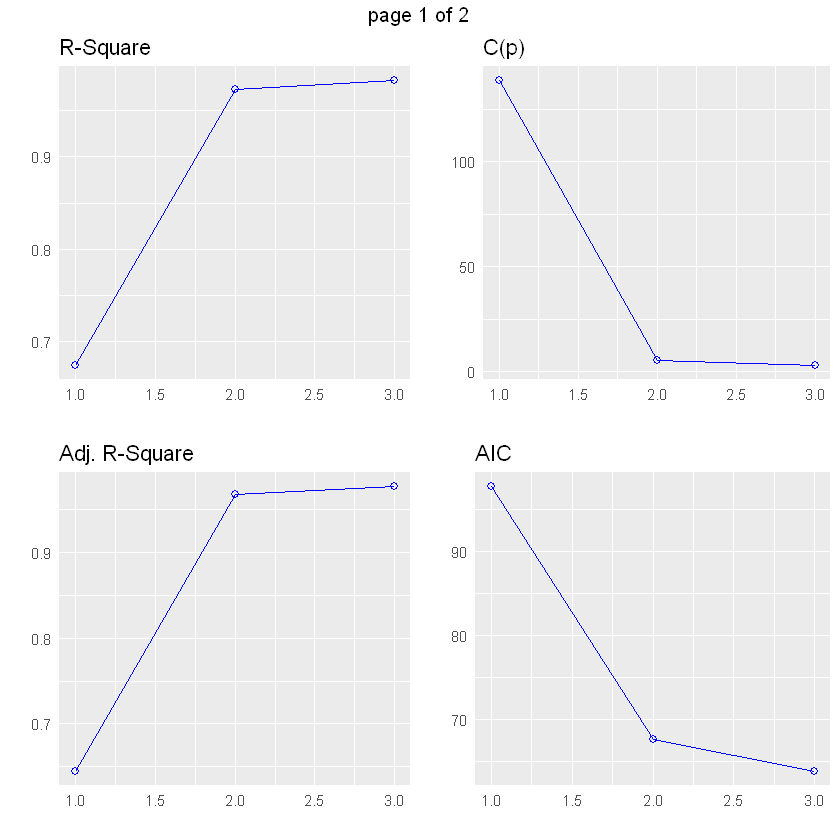

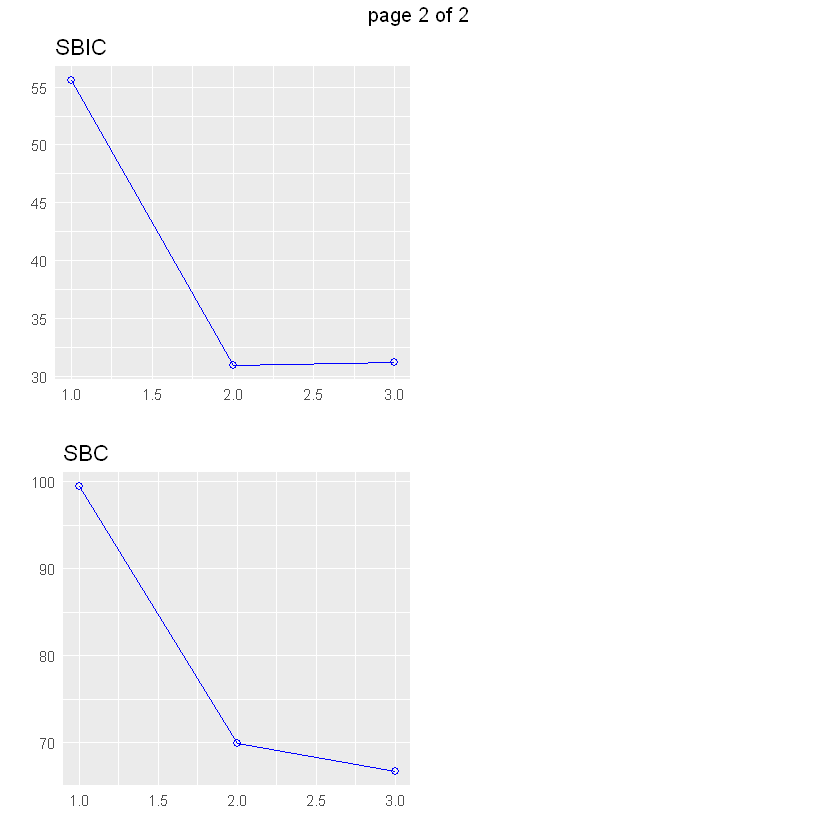

In [27]:
plot(BOTH)

<stepwise 문제점><br>
1. 변수가 몇개가 적당한지 알 수 없음<br>
2. 하나의 Final equation으로 끝나, 비슷하게 좋은 다른 후보들을 고려할 수 없음<br>
<br>
<주의사항><br>
1. 변수에서 나가는 순서가 중요한 순서 아님<br>
2. forward에서는 이미 선택 된 변수가 안 중요해져도 뺼 수가 없음<br>
3. 세 방법이 같은 결론에 도달하지 않을 수 있음<br>